In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from utils.masks import extract_masks, binarize, resample_mask
from utils.images import normalize, resample_img
from utils.registration import est_lin_transf, apply_lin_transf, est_nl_transf, apply_nl_transf
from utils.plot_methods import plot_lin_transf

## Project 2

### Task 1 Atlas Creation

In [5]:
## Extract masks for common dataset

# Lists of masks
masks = ['./data/common_40_mask.nii.gz',
         './data/common_41_mask.nii.gz',
         './data/common_42_mask.nii.gz']

# Left femur - label 2, Left hip bone - label 4
labels = [2,4] 

# Extract masks
extract_masks(masks, labels)

The new mask is saved as './data/common_40_mask_4_2.nii.gz'.
The new mask is saved as './data/common_41_mask_4_2.nii.gz'.
The new mask is saved as './data/common_42_mask_4_2.nii.gz'.


Text(0.5, 1.0, 'Image and the new mask')

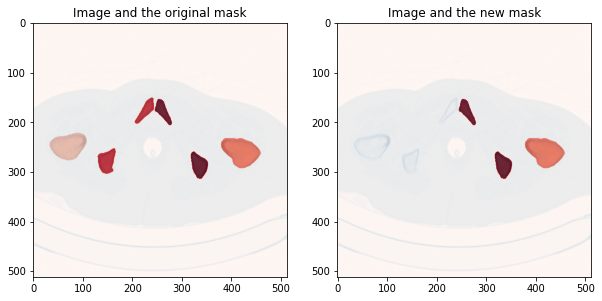

In [5]:
## Plot the extracted masks for one subject

# Load images
fix_img = sitk.ReadImage('./data/common_42_image.nii.gz', sitk.sitkFloat32)
fix_mask = sitk.ReadImage('./data/common_42_mask.nii.gz', sitk.sitkFloat32)
mask_new = sitk.ReadImage('./data/common_42_mask_4_2.nii.gz', sitk.sitkFloat32)

fix_img_data = sitk.GetArrayFromImage(fix_img)
fix_mask_data = sitk.GetArrayFromImage(fix_mask)
mask_new_data = sitk.GetArrayFromImage(mask_new)

# Plot original masks and extracted masks
idx = 30
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(fix_mask_data[idx], cmap = 'Reds', alpha = 0.8)
plt.title('Image and the original mask')

plt.subplot(122)
plt.imshow(fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(mask_new_data[idx], cmap = 'Reds', alpha = 0.8)
plt.title('Image and the new mask')

### Task 3 Atlas based-segmentation

In [2]:
fix_imgs_paths = ['./data/common_40_image.nii.gz',
                  './data/common_41_image.nii.gz',
                  './data/common_42_image.nii.gz']

## Use the masks from task 1
fix_masks_paths = ['./data/common_40_mask_4_2.nii.gz',
                   './data/common_41_mask_4_2.nii.gz',
                   './data/common_42_mask_4_2.nii.gz']

mov_imgs_paths = ['./data/g1_53_image.nii.gz',
                  './data/g1_54_image.nii.gz',
                  './data/g1_55_image.nii.gz']

#### Linear Registration

--------
Linear registration:
Final mean squares value: 0.03991476827825138
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 50.
Number of iterations: 50
--------


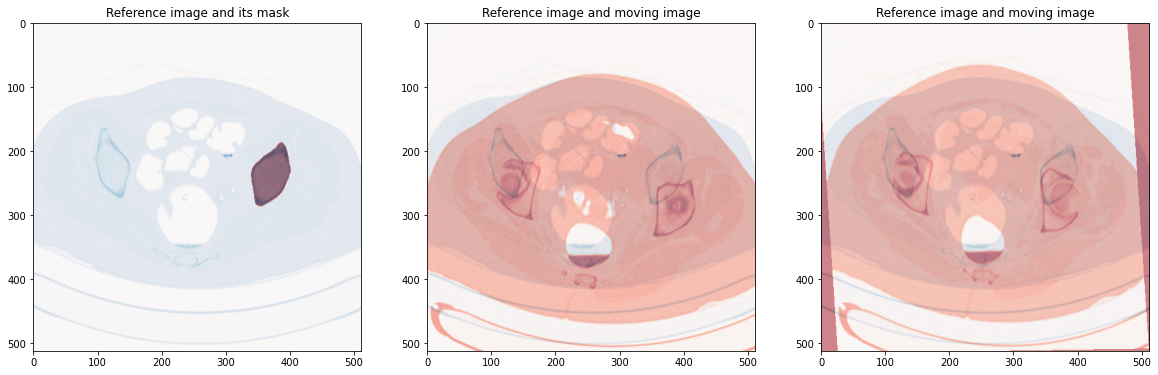

--------
Linear registration:
Final mean squares value: 0.03966388843509389
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 55.
Number of iterations: 55
--------


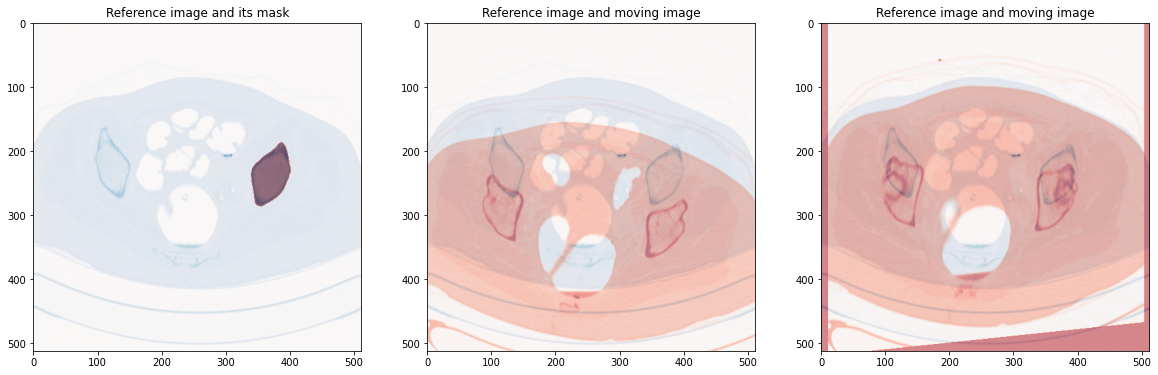

In [3]:
for i in range(len(fix_imgs_paths)):
    for mov_img_path in mov_imgs_paths:
        # Load reference image, mask and moving image
        fix_img = sitk.ReadImage(fix_imgs_paths[i], sitk.sitkFloat32)
        fix_mask = sitk.ReadImage(fix_masks_paths[i], sitk.sitkFloat32)
        mov_img = sitk.ReadImage(mov_img_path, sitk.sitkFloat32)

        # Resample the images to be the same size
        # Normalize the images
        # Binarize the mask
        fix_img = resample_img(fix_img, out_size= [512,512,256])
        fix_mask = resample_mask(fix_mask, out_size= [512,512,256])
        mov_img = resample_img(mov_img, out_size= [512,512,256])

        # fix_img = normalize(fix_img)
        # mov_img = normalize(mov_img)
        fix_mask = binarize(fix_mask)

        # Estimate Linear Registration
        lin_tranf = est_lin_transf(fix_img, fix_mask, mov_img)

        # Apply Registration to the moving image
        mov_img_resampled = apply_lin_transf(fix_img, mov_img, lin_tranf)

        # Plot the results
        plot_lin_transf(fix_img,fix_mask,mov_img,mov_img_resampled,idx=100)
        
        